##### Load libs:

In [36]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

##### 1.Create connect:

In [37]:
connect = sqlite3.connect('../data/checking-logs.sqlite')

##### 2.Load data:

In [38]:
data = pd.io.sql.read_sql(
	"SELECT uid, DATE(timestamp) AS timestamp, numTrials " \
	"FROM checker " \
	"WHERE status = 'ready' AND uid LIKE 'user%' AND labname = 'project1'",
	connect,
	parse_dates='timestamp'
)

data=data.groupby(['uid','timestamp'], as_index = False).numTrials.max()
data

,uid,timestamp,numTrials
0,user_1,2020-05-14,11
1,user_10,2020-05-12,7
2,user_10,2020-05-13,21
3,user_10,2020-05-14,59
4,user_11,2020-05-03,1
...,...,...,...
89,user_4,2020-05-13,137
90,user_4,2020-05-14,164
91,user_6,2020-05-13,1
92,user_6,2020-05-14,2


##### 3.Plot:

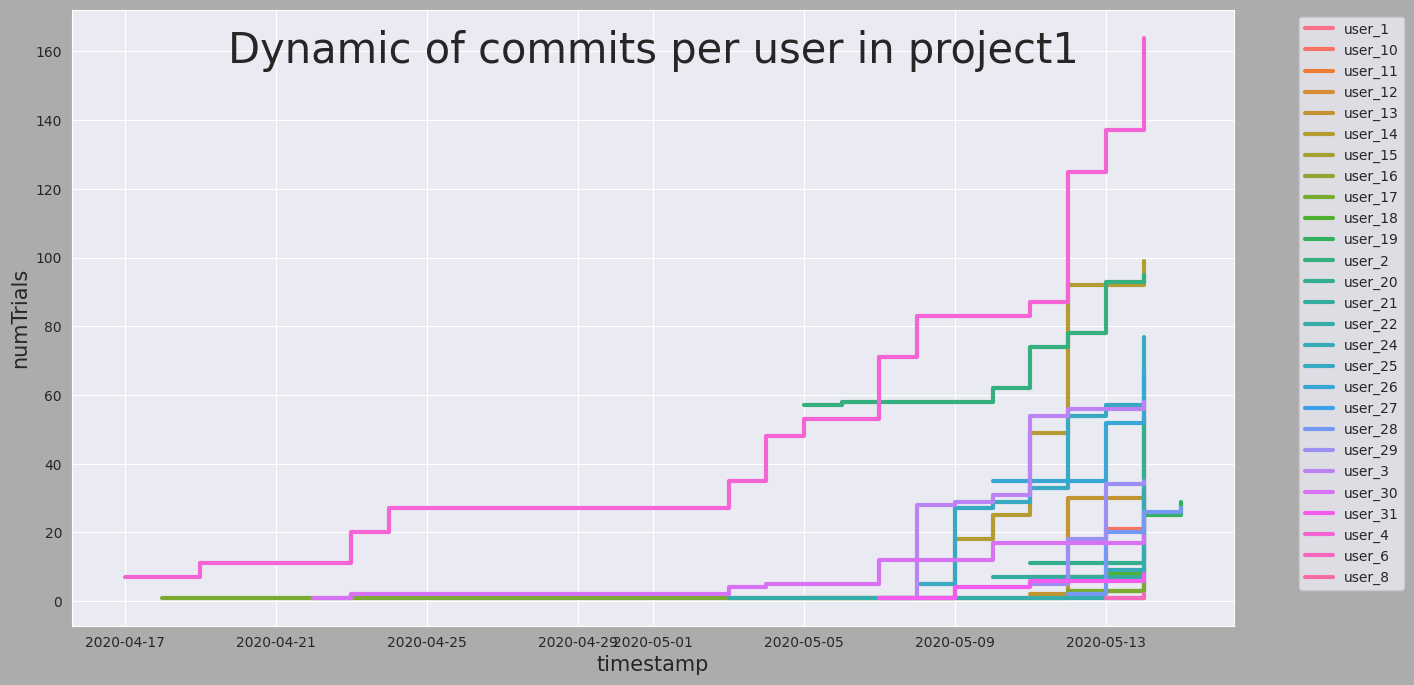

In [32]:
fig, ax = plt.subplots(figsize=(15,8))
fig.patch.set_facecolor("#ACACAC")
palette = sns.color_palette("husl", n_colors=len(data['uid'].unique()))
plot = sns.lineplot(data=data,x='timestamp',y='numTrials'
                    ,hue='uid',
                    palette=palette,
					drawstyle='steps-post',
                    style = sns.set_style('darkgrid'),
                    ax = ax, linewidth=3)

ax.set_title('Dynamic of commits per user in project1', fontsize = 30, y = 0.9)
ax.set_xlabel(xlabel= 'timestamp', fontdict={'size':15})
ax.set_ylabel(ylabel= 'numTrials', fontdict={'size':15})
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### 4.Questions:

Какой пользователь лидировал по количеству коммитов почти всегда?<br>Ответ: user_4

Какой пользователь был лидером только короткий период времени?<br>Ответ: user_2

##### 5.Close connect:

In [33]:
connect.close()